In [1]:
# Import the required libraries
import pandas as pd
import numpy as np

In [3]:
# Load the data 
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Glucose,BloodPressure,Diabetes
0,148,72,1
1,85,66,0
2,183,64,1
3,89,66,0
4,137,40,1


In [4]:
# Define the calculate entropy function
def calculate_entropy(df_label):
    classes,class_counts = np.unique(df_label,return_counts = True)
    entropy_value = np.sum([(-class_counts[i]/np.sum(class_counts))*np.log2(class_counts[i]/np.sum(class_counts)) 
                        for i in range(len(classes))])
    return entropy_value


In [5]:
# Define the calculate information gain function
def calculate_information_gain(dataset,feature,label): 
    # Calculate the dataset entropy
    dataset_entropy = calculate_entropy(dataset[label])   
    values,feat_counts= np.unique(dataset[feature],return_counts=True)
    
    # Calculate the weighted feature entropy                                # Call the calculate_entropy function
    weighted_feature_entropy = np.sum([(feat_counts[i]/np.sum(feat_counts))*calculate_entropy(dataset.where(dataset[feature]
                              ==values[i]).dropna()[label]) for i in range(len(values))])    
    feature_info_gain = dataset_entropy - weighted_feature_entropy
    return feature_info_gain

In [6]:
# Set the features and label
features = df.columns[:-1]
label = 'diabetes'
parent=None
features

Index(['Glucose', 'BloodPressure'], dtype='object')

In [ ]:
#Define the create decision tree function
def create_decision_tree(dataset,df,features,label,parent):
    datum = np.unique(df[label],return_counts=True)
    unique_data = np.unique(dataset[label])

    if len(unique_data) <= 1:
        return unique_data[0]
    elif len(dataset) == 0:
        return unique_data[np.argmax(datum[1])]
    
    elif len(features) == 0:
        return parent
    else:
        parent = unique_data[np.argmax(datum[1])]
        

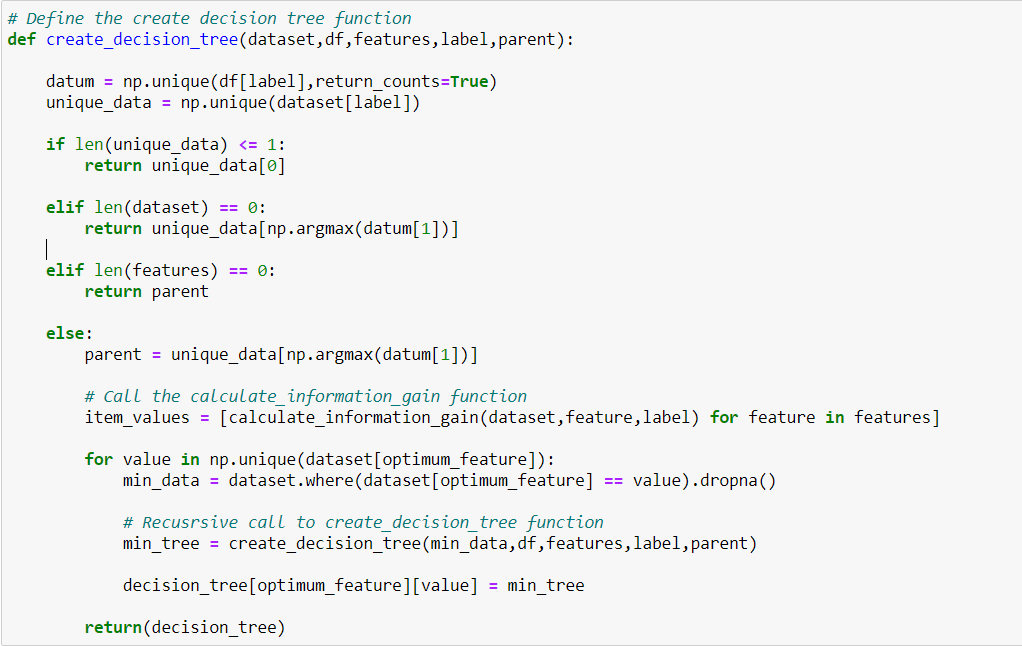

In [7]:
# Train the decision tree model
decision_tree = create_decision_tree(df,df,features,label,parent)

NameError: ignored

In [ ]:
# Predict using the trained model
sample_data = {'glucose':86,'bloodpressure':104}
test_data = pd.Series(sample_data)
prediction = predict_diabetes(test_data,decision_tree)
prediction

1.0